# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Adindra Vickar Ega
- **Email:** adindravickar@gmail.com
- **ID Dicoding:** mahega_0107

## Menentukan Pertanyaan Bisnis

- Bagaimana tren nilai PM2.5 di berbagai weather station China dalam kurun waktu 4 tahun dari tahun 2013 - 2017 ? Di stasiun cuaca mana, nilai PM2.5 cenderung tinggi setiap tahunnya ?
- Bagaimana korelasi antara faktor cuaca (suhu, kelembaban, kecepatan angin, dsb) terhadap nilai PM2.5 ? Bagaimana pula korelasi antar polutan udara satu sama lain? apa faktor yang paling berpengaruh terhadap nilai PM2.5 ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Data Wrangling

### Gathering Data

In [2]:
data_folder_path = "C:/Users/Dell/Downloads/submission/data/"

In [3]:
# Load the 1st CSV file (Aotizhongxin station data)
aotizhongxin_file_path = os.path.join(data_folder_path, 'PRSA_Data_Aotizhongxin_20130301-20170228.csv')
aotizhongxin_df = pd.read_csv(aotizhongxin_file_path)
aotizhongxin_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [4]:
# Load the 2nd CSV file (Changping station data)
changping_file_path = os.path.join(data_folder_path, 'PRSA_Data_Changping_20130301-20170228.csv')
changping_df = pd.read_csv(changping_file_path)
changping_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping

In [5]:
# Load the 3rd CSV file (Dingling station data)
dingling_file_path = os.path.join(data_folder_path, 'PRSA_Data_Dingling_20130301-20170228.csv')
dingling_df = pd.read_csv(dingling_file_path)
dingling_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [6]:
# Load the 4th CSV file (Dongsi station data)
dongsi_file_path = os.path.join(data_folder_path, 'PRSA_Data_Dongsi_20130301-20170228.csv')
dongsi_df = pd.read_csv(dongsi_file_path)
dongsi_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

In [7]:
# Load the 5th CSV file (Guanyuan station data)
guanyuan_file_path = os.path.join(data_folder_path, 'PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_df = pd.read_csv(dongsi_file_path)
guanyuan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

In [8]:
# Load the 6th CSV file (Gucheng station data)
gucheng_file_path = os.path.join(data_folder_path, 'PRSA_Data_Gucheng_20130301-20170228.csv')
gucheng_df = pd.read_csv(gucheng_file_path)
gucheng_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

In [9]:
# Load the 7th CSV file (Huairou station data)
huairou_file_path = os.path.join(data_folder_path, 'PRSA_Data_Huairou_20130301-20170228.csv')
huairou_df = pd.read_csv(huairou_file_path)
huairou_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou

In [10]:
# Load the 8th CSV file (Nongzhanguan station data)
nongzhanguan_file_path = os.path.join(data_folder_path, 'PRSA_Data_Nongzhanguan_20130301-20170228.csv')
nongzhanguan_df = pd.read_csv(nongzhanguan_file_path)
nongzhanguan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

In [11]:
# Load the 9th CSV file (Shunyi station data)
shunyi_file_path = os.path.join(data_folder_path, 'PRSA_Data_Shunyi_20130301-20170228.csv')
shunyi_df = pd.read_csv(shunyi_file_path)
shunyi_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi

In [12]:
# Load the 10th CSV file (Tiantan station data)
tiantan_file_path = os.path.join(data_folder_path, 'PRSA_Data_Tiantan_20130301-20170228.csv')
tiantan_df = pd.read_csv(tiantan_file_path)
tiantan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan

In [13]:
# Load the 11th CSV file (Wanliu station data)
wanliu_file_path = os.path.join(data_folder_path, 'PRSA_Data_Wanliu_20130301-20170228.csv')
wanliu_df = pd.read_csv(wanliu_file_path)
wanliu_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu

In [14]:
# Load the 12th CSV file (Wanshouxigong station data)
wanshouxigong_file_path = os.path.join(data_folder_path, 'PRSA_Data_Wanshouxigong_20130301-20170228.csv')
wanshouxigong_df = pd.read_csv(wanshouxigong_file_path)
wanshouxigong_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong

**Insight:**
- The dataset contains 18 columns, including time-related columns (year, month, day, hour), air quality measurements (PM2.5, PM10, SO2, NO2, CO, O3), weather data (temperature, pressure, dew point, wind speed, wind direction), and the name of the station location.
- Overall, the data is in numeric format, except for the wind direction (wd), and the name of station

### Assessing Data

**Menilai tabel aotizhongxin_df**

In [15]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
aotizhongxin_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

**Menilai tabel changping_df**

In [19]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [20]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
changping_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34290.000000  34482.000000  34436.000000  34397.000000  33543.000000   
mean      71.099743     94.657871     14.958906     44.182086   1152.301345   
std       72.326926     83.441738     20.975331     29.519796   1103.056282   
min        2.000000      2.000000      0.285600      1.847700    100.000000   
25%       18.000000     34.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%      100.000000    131.000000     18.000000     60.358200   1400.000000   
max      882.000000    999.000000    310.000000    226.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34460.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      57.940003     13.686111   1007.760278      1.505495      0.060366   
std       54.316674     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       15.636600      3.400000    999.300000    -10.200000      0.000000   
50%       46.000000     14.700000   1007.400000      1.800000      0.000000   
75%       80.000000     23.300000   1016.000000     14.200000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

**Menilai tabel dingling_df**

In [23]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [24]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
dingling_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

**Menilai tabel dongsi_df**

In [27]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [28]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
dongsi_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

**Menilai tabel guanyuan_df**

In [31]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [32]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
guanyuan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

**Menilai tabel gucheng_df**

In [35]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [36]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
gucheng_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526     36.473860   1208.957772   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

**Menilai tabel huairou_df**

In [39]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [40]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [41]:
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
huairou_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

**Menilai tabel nongzhanguan_df**

In [43]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [44]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [45]:
print("Jumlah duplikasi: ", nongzhanguan_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
nongzhanguan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665     36.297740   1245.166124   
min        2.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     29.000000    500.000000   
50%       59.000000     85.000000      9.000000     51.000000    900.000000   
75%      116.000000    149.000000     23.000000     80.000000   1600.000000   
max      844.000000    995.000000    257.000000    273.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34558.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      58.534682     13.671490   1012.547419      2.447535      0.064020   
std       58.401448     11.458418     10.266059     13.810696      0.786282   
min        0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%       10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       45.000000     14.600000   1012.200000      3.000000      0.000000   
75%       84.000000     23.500000   1020.900000     15.000000      0.000000   
max      390.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

**Menilai tabel shunyi_df**

In [47]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [48]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [49]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
shunyi_df.describe(include='all')

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       79.491602     98.737026     13.572039     43.908865   1187.063979   
std        81.231739     89.143718     19.572068     30.996828   1156.374102   
min         2.000000      2.000000      0.285600      2.000000    100.000000   
25%        19.000000     31.000000      2.000000     19.000000    400.000000   
50%        55.000000     77.000000      5.000000     37.000000    800.000000   
75%       112.000000    138.000000     17.000000     62.000000   1500.000000   
max       941.000000    999.000000    239.000000    258.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   33575.000000  35013.000000  35013.000000  35010.000000  35013.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       55.201321     13.387969   1013.061938      2.465036      0.061094   
std        54.873726     11.483588     10.177339     13.726622      0.761668   
min         0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%        10.000000      3.000000   1004.700000     -8.800000      0.000000   
50%        43.000000     14.400000   1012.700000      3.100000      0.000000   
75%        77.000000     23.200000   1021.000000     15.100000      0.000000   
max       351.716400     40.600000   1042.800000     27.500000     37.300000   

           wd          WSPM station  
count   34581  35020.000000   35064  
unique     16           NaN       1  
top       NNE           NaN  Shunyi  
freq     4540           NaN   35064  
mean      NaN      1.807533     NaN  
std       NaN      1.287817     NaN  
min       NaN      0.000000     NaN  
25%       NaN      1.000000     NaN  
50%       NaN      1.500000     NaN  
75%       NaN      2.300000     NaN  
max       NaN     12.800000     NaN

**Menilai tabel tiantan_df**

In [51]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [52]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [53]:
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [54]:
tiantan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631     31.946224   1170.593297   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     41.000000      3.000000     28.000000    500.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      113.000000    144.000000     17.000000     71.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.984297     13.671490   1012.547419      2.447535      0.064020   
std       59.081528     11.458418     10.266059     13.810696      0.786282   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

**Menilai tabel wanliu_df**

In [55]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [56]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [57]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [58]:
wanliu_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.795065     22.609648     37.996088   1268.114331   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       23.000000     40.000000      4.000000     36.000000    500.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      116.000000    153.000000     23.000000     88.000000   1600.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32957.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      48.873614     13.428865   1011.097536      3.266588      0.068263   
std       55.111740     11.346931     10.355247     13.678060      0.896726   
min        0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%        4.000000      3.200000   1002.500000     -8.100000      0.000000   
50%       32.000000     14.300000   1010.800000      4.000000      0.000000   
75%       73.000000     22.900000   1019.400000     15.800000      0.000000   
max      364.000000     40.500000   1040.300000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.501215  
std        1.104472  
min        0.000000  
25%        0.800000  
50%        1.200000  
75%        2.000000  
max       11.200000

**Menilai tabel wanshouxigong_df**

In [59]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [60]:
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [61]:
print("Jumlah duplikasi: ", wanshouxigong_df.duplicated().sum())

Jumlah duplikasi:  0


In [62]:
wanshouxigong_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35.80805   1223.139114   
min        3.000000      2.000000      0.285600      2.00000    100.000000   
25%       23.000000     39.000000      3.000000     28.00000    600.000000   
50%       60.000000     91.000000      8.000000     49.00000   1000.000000   
75%      116.000000    154.000000     21.000000     77.00000   1700.000000   
max      999.000000    961.000000    411.000000    251.00000   9800.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33986.000000  35045.000000  35045.000000  35045.000000  35045.000000   
mean      56.229904     13.784477   1011.511804      2.707442      0.064320   
std       57.082710     11.385156     10.570928     13.704139      0.796981   
min        0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%        8.000000      3.400000   1002.800000     -8.500000      0.000000   
50%       42.000000     14.800000   1011.000000      3.300000      0.000000   
75%       82.000000     23.500000   1020.000000     15.200000      0.000000   
max      358.000000     40.600000   1042.000000     28.500000     46.400000   

               WSPM  
count  35051.000000  
mean       1.745314  
std        1.206355  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       13.200000

**Insight:**
- Terdapat missing value di kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM di semua station. Jumlah missing value bervariasi di tiap station
- Tidak terdapat nilai duplikasi di semua data station

### Cleaning Data

**Membersihkan tabel aotizhongxin_df**

##### Missing Value

In [63]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [64]:
aotizhongxin_df[aotizhongxin_df['PM2.5'].isna()]


No  year  month  day  hour  PM2.5   PM10      SO2      NO2      CO  \
1509    1510  2013      5    2    21    NaN  183.0  63.0000  93.0000  1200.0   
1837    1838  2013      5   16    13    NaN   98.0  46.0000  35.0000   600.0   
2368    2369  2013      6    7    16    NaN  137.0  12.0000  74.0000  2500.0   
2785    2786  2013      6   25     1    NaN   35.0   3.1416  35.1063     NaN   
2808    2809  2013      6   26     0    NaN  183.0  64.2600  40.0335     NaN   
...      ...   ...    ...  ...   ...    ...    ...      ...      ...     ...   
34880  34881  2017      2   21     8    NaN    NaN      NaN      NaN     NaN   
34883  34884  2017      2   21    11    NaN    NaN      NaN      NaN     NaN   
34885  34886  2017      2   21    13    NaN    NaN      NaN      NaN     NaN   
35028  35029  2017      2   27    12    NaN    NaN      NaN      NaN     NaN   
35029  35030  2017      2   27    13    NaN    NaN      NaN      NaN     NaN   

             O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
1509    38.0000  18.5  1006.1   6.0   0.0   SE   2.8  Aotizhongxin  
1837   166.0000  26.1  1009.9  10.7   0.0   SW   2.7  Aotizhongxin  
2368     8.0000  20.7  1002.4  19.4   0.0  NNE   0.8  Aotizhongxin  
2785    60.6186  20.8   996.5  20.5   0.0   NE   0.2  Aotizhongxin  
2808        NaN  21.7   993.0  21.2   0.0  NNW   0.4  Aotizhongxin  
...         ...   ...     ...   ...   ...  ...   ...           ...  
34880       NaN  -0.3  1028.8 -15.8   0.0  SSE   1.0  Aotizhongxin  
34883       NaN   1.3  1028.0 -16.1   0.0    S   1.5  Aotizhongxin  
34885       NaN  -2.1  1027.4  -4.1   0.7  WSW   3.2  Aotizhongxin  
35028       NaN  12.1  1017.3  -5.4   0.0  SSW   1.2  Aotizhongxin  
35029       NaN  14.0  1015.8  -5.2   0.0  SSE   1.8  Aotizhongxin  

[925 rows x 18 columns]

In [65]:
aotizhongxin_df[aotizhongxin_df['CO'].isna()]

No  year  month  day  hour  PM2.5   PM10       SO2       NO2  CO  \
75        76  2013      3    4     3   12.0   34.0    6.0000   12.0000 NaN   
124      125  2013      3    6     4  192.0  203.0   83.6808  140.4252 NaN   
171      172  2013      3    8     3  324.0  373.0   71.0000  154.0000 NaN   
178      179  2013      3    8    10  326.0  844.0  125.9496  179.2269 NaN   
267      268  2013      3   12     3  117.0  127.0   73.0000   81.0000 NaN   
...      ...   ...    ...  ...   ...    ...    ...       ...       ...  ..   
34885  34886  2017      2   21    13    NaN    NaN       NaN       NaN NaN   
34912  34913  2017      2   22    16  131.0  131.0       NaN   95.0000 NaN   
35027  35028  2017      2   27    11  122.0  122.0       NaN       NaN NaN   
35028  35029  2017      2   27    12    NaN    NaN       NaN       NaN NaN   
35029  35030  2017      2   27    13    NaN    NaN       NaN       NaN NaN   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
75     77.0   7.2  1016.9 -11.6   0.0    N   2.8  Aotizhongxin  
124    22.0   3.9  1007.3  -6.1   0.0   NE   1.4  Aotizhongxin  
171    84.0   1.8   997.9  -1.8   0.0    N   0.0  Aotizhongxin  
178    84.0  19.1  1000.9  -0.4   0.0  SSW   1.9  Aotizhongxin  
267    47.0   6.4  1005.8  -1.0   0.1    N   2.2  Aotizhongxin  
...     ...   ...     ...   ...   ...  ...   ...           ...  
34885   NaN  -2.1  1027.4  -4.1   0.7  WSW   3.2  Aotizhongxin  
34912  47.0   6.0  1017.0  -4.2   0.0  WNW   1.2  Aotizhongxin  
35027  42.0  10.0  1018.3  -5.6   0.0  ESE   1.4  Aotizhongxin  
35028   NaN  12.1  1017.3  -5.4   0.0  SSW   1.2  Aotizhongxin  
35029   NaN  14.0  1015.8  -5.2   0.0  SSE   1.8  Aotizhongxin  

[1776 rows x 18 columns]

In [66]:
# Drop rows with any missing values
aotizhongxin_df_cleaned = aotizhongxin_df.dropna()

# Optionally, reset the index
#aotizhongxin_df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
aotizhongxin_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### Inaccurate value 

In [67]:
aotizhongxin_df_cleaned.describe()

No          year         month           day          hour  \
count  31815.000000  31815.000000  31815.000000  31815.000000  31815.000000   
mean   17899.423857   2014.714914      6.401886     15.578564     11.624800   
std    10058.429849      1.162536      3.416847      8.794954      6.926874   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9415.500000   2014.000000      3.000000      8.000000      6.000000   
50%    18093.000000   2015.000000      6.000000     15.000000     12.000000   
75%    26590.500000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

             PM2.5          PM10           SO2           NO2            CO  \
count  31815.00000  31815.000000  31815.000000  31815.000000  31815.000000   
mean      81.86363    109.120685     17.167205     58.976332   1256.574729   
std       80.44949     93.718017     22.760801     37.061384   1223.301208   
min        3.00000      2.000000      0.571200      2.000000    100.000000   
25%       22.00000     37.000000      3.000000     30.000000    500.000000   
50%       58.00000     86.000000      8.000000     53.000000    800.000000   
75%      114.00000    154.000000     21.000000     82.000000   1500.000000   
max      713.00000    948.000000    229.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  31815.000000  31815.000000  31815.000000  31815.000000  31815.000000   
mean      56.240938     13.775611   1011.800385      3.241106      0.068235   
std       57.834314     11.369035     10.338869     13.667863      0.837489   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.400000   1003.300000     -8.000000      0.000000   
50%       42.000000     14.800000   1011.200000      4.000000      0.000000   
75%       82.000000     23.400000   1020.000000     15.700000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     46.400000   

               WSPM  
count  31815.000000  
mean       1.720471  
std        1.204240  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

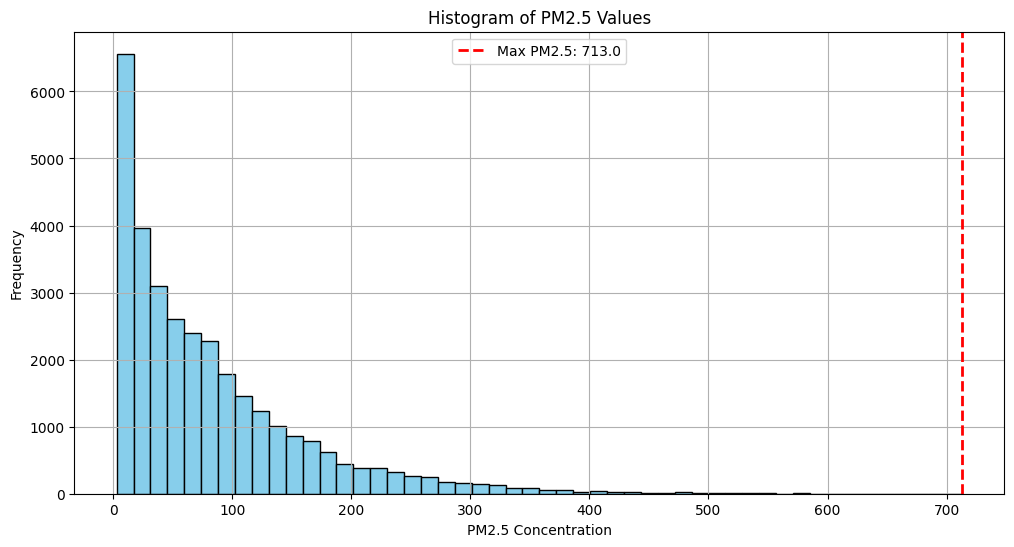

In [68]:
# Plot the histogram for PM2.5
plt.figure(figsize=(12, 6))
plt.hist(aotizhongxin_df_cleaned['PM2.5'], bins=50, color='skyblue', edgecolor='black')

# Add a vertical line for the max PM2.5 value
max_pm25 = aotizhongxin_df_cleaned['PM2.5'].max()
plt.axvline(max_pm25, color='red', linestyle='dashed', linewidth=2, label=f'Max PM2.5: {max_pm25}')

# Add labels and title
plt.title('Histogram of PM2.5 Values')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [69]:
# Drop rows where PM2.5 is greater than 400
aotizhongxin_df_cleaned = aotizhongxin_df_cleaned[aotizhongxin_df_cleaned['PM2.5'] <= 400]

# Optionally, you can reset the index after dropping rows
aotizhongxin_df_cleaned.reset_index(drop=True, inplace=True)

In [70]:
aotizhongxin_df_cleaned.describe()

No          year         month           day          hour  \
count  31604.000000  31604.000000  31604.000000  31604.000000  31604.000000   
mean   17876.171149   2014.711587      6.409885     15.585211     11.626535   
std    10048.925326      1.161215      3.404147      8.785283      6.915648   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9422.750000   2014.000000      3.000000      8.000000      6.000000   
50%    18075.500000   2015.000000      6.000000     15.000000     12.000000   
75%    26570.250000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  31604.000000  31604.000000  31604.000000  31604.000000  31604.000000   
mean      79.289786    106.526503     16.927403     58.368308   1223.874573   
std       74.101352     88.107025     22.187710     36.284115   1145.147145   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     37.000000      3.000000     30.000000    500.000000   
50%       57.000000     85.000000      8.000000     53.000000    800.000000   
75%      112.000000    152.000000     21.000000     81.000000   1500.000000   
max      400.000000    948.000000    197.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  31604.000000  31604.000000  31604.000000  31604.000000  31604.000000   
mean      56.522954     13.860160   1011.769769      3.278572      0.068172   
std       57.875563     11.345679     10.351926     13.693238      0.835467   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.600000   1003.200000     -8.000000      0.000000   
50%       43.000000     14.900000   1011.100000      4.200000      0.000000   
75%       83.000000     23.400000   1020.000000     15.700000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     46.400000   

               WSPM  
count  31604.000000  
mean       1.724883  
std        1.206208  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       11.200000

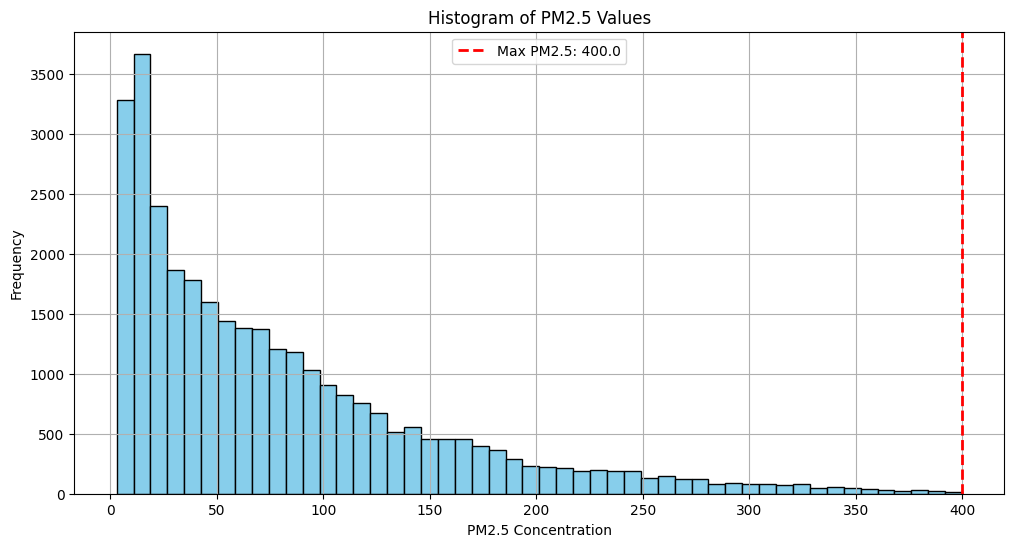

In [71]:
# Plot the histogram for PM2.5
plt.figure(figsize=(12, 6))
plt.hist(aotizhongxin_df_cleaned['PM2.5'], bins=50, color='skyblue', edgecolor='black')

# Add a vertical line for the max PM2.5 value
max_pm25 = aotizhongxin_df_cleaned['PM2.5'].max()
plt.axvline(max_pm25, color='red', linestyle='dashed', linewidth=2, label=f'Max PM2.5: {max_pm25}')

# Add labels and title
plt.title('Histogram of PM2.5 Values')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

# Show the plot
plt.show()


**Membersihkan tabel changping_df**

In [72]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [73]:
# Drop rows with any missing values
changping_df_cleaned = changping_df.dropna()

changping_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [74]:
changping_df_cleaned.describe()

No          year         month           day          hour  \
count  32681.000000  32681.000000  32681.000000  32681.000000  32681.000000   
mean   17876.569658   2014.703130      6.507481     15.715156     11.506992   
std    10010.547363      1.165678      3.478965      8.729951      6.940587   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9384.000000   2014.000000      3.000000      8.000000      6.000000   
50%    17910.000000   2015.000000      7.000000     16.000000     11.000000   
75%    26546.000000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32681.000000  32681.000000  32681.000000  32681.000000  32681.000000   
mean      70.312328     94.086402     15.061357     44.319035   1151.716441   
std       70.955607     82.610340     21.057574     29.591375   1105.646637   
min        3.000000      2.000000      1.000000      2.000000    100.000000   
25%       18.000000     33.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%       99.000000    130.000000     18.000000     61.000000   1400.000000   
max      662.000000    992.000000    310.000000    208.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32681.000000  32681.000000  32681.000000  32681.000000  32681.000000   
mean      57.424541     13.401677   1007.994009      1.135299      0.060736   
std       53.792603     11.393462     10.177785     13.841226      0.765286   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       15.000000      3.100000    999.500000    -10.600000      0.000000   
50%       46.000000     14.100000   1007.700000      1.100000      0.000000   
75%       79.000000     23.100000   1016.300000     13.900000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  32681.000000  
mean       1.865757  
std        1.308218  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

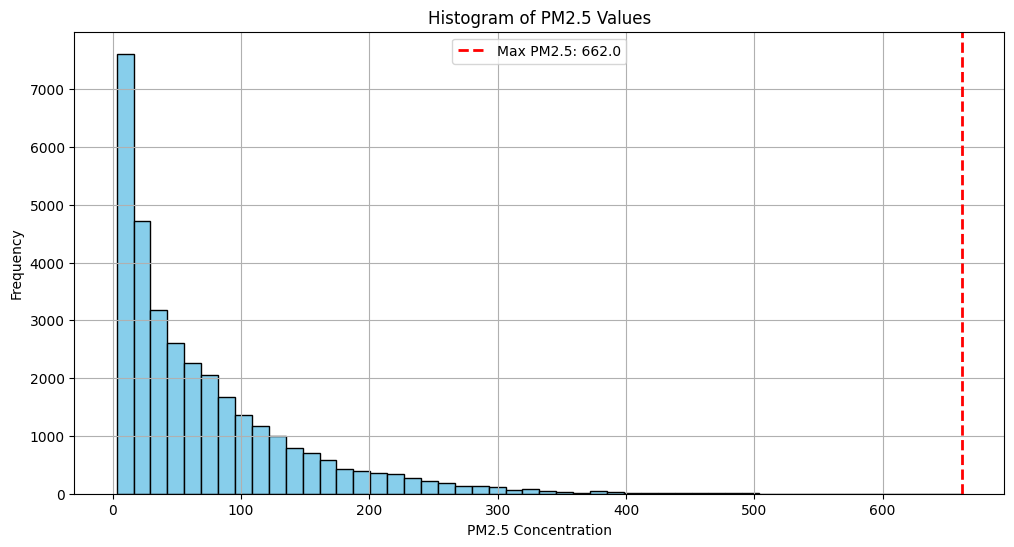

In [75]:
# Plot the histogram for PM2.5
plt.figure(figsize=(12, 6))
plt.hist(changping_df_cleaned['PM2.5'], bins=50, color='skyblue', edgecolor='black')

# Add a vertical line for the max PM2.5 value
max_pm25 = changping_df_cleaned['PM2.5'].max()
plt.axvline(max_pm25, color='red', linestyle='dashed', linewidth=2, label=f'Max PM2.5: {max_pm25}')

# Add labels and title
plt.title('Histogram of PM2.5 Values')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [76]:
# Drop rows where PM2.5 is greater than 400
changping_df_cleaned = changping_df_cleaned[changping_df_cleaned['PM2.5'] <= 400]

# Optionally, you can reset the index after dropping rows
changping_df_cleaned.reset_index(drop=True, inplace=True)

In [77]:
changping_df_cleaned.describe()

No          year         month           day          hour  \
count  32598.000000  32598.000000  32598.000000  32598.000000  32598.000000   
mean   17861.072397   2014.701362      6.507393     15.719369     11.501074   
std    10005.861556      1.165162      3.473872      8.725098      6.938874   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9378.250000   2014.000000      3.000000      8.000000      6.000000   
50%    17890.500000   2015.000000      7.000000     16.000000     11.000000   
75%    26530.750000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32598.000000  32598.000000  32598.000000  32598.000000  32598.000000   
mean      69.330824     93.010666     15.005497     44.062869   1137.767501   
std       68.283755     79.707064     20.944134     29.100924   1064.754424   
min        3.000000      2.000000      1.000000      2.000000    100.000000   
25%       18.000000     33.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%       98.000000    129.000000     18.000000     61.000000   1400.000000   
max      400.000000    992.000000    310.000000    208.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32598.000000  32598.000000  32598.000000  32598.000000  32598.000000   
mean      57.537745     13.431759   1007.984813      1.147500      0.060887   
std       53.798484     11.386216     10.184582     13.853394      0.766254   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       15.000000      3.100000    999.500000    -10.700000      0.000000   
50%       46.000000     14.100000   1007.700000      1.200000      0.000000   
75%       79.000000     23.100000   1016.300000     13.900000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  32598.000000  
mean       1.867612  
std        1.309188  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

**Membersihkan tabel dingling_df**

In [78]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [79]:
# Drop rows with any missing values
dingling_df_cleaned = dingling_df.dropna()

dingling_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [80]:
dingling_df_cleaned.describe()

No          year         month           day          hour  \
count  31306.000000  31306.000000  31306.000000  31306.000000  31306.000000   
mean   17951.165719   2014.718297      6.422603     15.881237     11.504248   
std     9928.922785      1.147383      3.457774      8.724373      6.952859   
min        3.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9888.250000   2014.000000      3.000000      8.000000      6.000000   
50%    18100.500000   2015.000000      6.000000     16.000000     11.000000   
75%    26268.750000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  31306.000000  31306.000000  31306.000000  31306.000000  31306.000000   
mean      66.512518     84.527803     11.944167     27.267578    916.547211   
std       72.434045     80.077511     15.625691     26.199002    910.281798   
min        3.000000      2.000000      1.000000      2.000000    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     61.000000      5.000000     19.000000    600.000000   
75%       93.000000    118.000000     15.000000     37.000000   1200.000000   
max      647.000000    905.000000    150.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  31306.000000  31306.000000  31306.000000  31306.000000  31306.000000   
mean      69.449698     13.556274   1007.708007      1.403411      0.062387   
std       54.576024     11.451666     10.286864     13.851456      0.776216   
min        0.214200    -16.600000    982.800000    -35.100000      0.000000   
25%       31.000000      3.000000    999.200000    -10.500000      0.000000   
50%       62.000000     14.600000   1007.100000      1.600000      0.000000   
75%       91.000000     23.300000   1016.000000     14.300000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  31306.000000  
mean       1.850939  
std        1.295511  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

In [81]:
# Drop rows where PM2.5 is greater than 400
dingling_df_cleaned = dingling_df_cleaned[dingling_df_cleaned['PM2.5'] <= 400]

# Optionally, you can reset the index after dropping rows
dingling_df_cleaned.reset_index(drop=True, inplace=True)

In [82]:
dingling_df_cleaned.describe()

No          year         month           day          hour  \
count  31214.000000  31214.000000  31214.000000  31214.000000  31214.000000   
mean   17936.508362   2014.716954      6.418562     15.885020     11.498110   
std     9928.406004      1.147840      3.451883      8.720775      6.953446   
min        3.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9884.250000   2014.000000      3.000000      8.000000      5.000000   
50%    18075.500000   2015.000000      6.000000     16.000000     11.000000   
75%    26260.750000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  31214.000000  31214.000000  31214.000000  31214.000000  31214.000000   
mean      65.330105     83.337874     11.862821     26.954053    900.404530   
std       69.107272     76.919141     15.481199     25.523084    854.593939   
min        3.000000      2.000000      1.000000      2.000000    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.675000     15.000000     37.000000   1200.000000   
max      400.000000    905.000000    150.000000    184.000000   9600.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  31214.000000  31214.000000  31214.000000  31214.000000  31214.000000   
mean      69.623061     13.592549   1007.695222      1.417278      0.062565   
std       54.545775     11.446190     10.295625     13.868503      0.777352   
min        0.214200    -16.600000    982.800000    -35.100000      0.000000   
25%       31.000000      3.100000    999.200000    -10.500000      0.000000   
50%       62.000000     14.600000   1007.100000      1.600000      0.000000   
75%       91.000000     23.300000   1016.000000     14.400000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  31214.000000  
mean       1.852768  
std        1.296544  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

**Membersihkan tabel dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df**

In [83]:
# Drop rows with any missing values
dongsi_df_cleaned = dongsi_df.dropna()
guanyuan_df_cleaned = guanyuan_df.dropna()
gucheng_df_cleaned = gucheng_df.dropna()
huairou_df_cleaned = huairou_df.dropna()
nongzhanguan_df_cleaned = nongzhanguan_df.dropna()
shunyi_df_cleaned = shunyi_df.dropna()
tiantan_df_cleaned = tiantan_df.dropna()
wanliu_df_cleaned = wanliu_df.dropna()
wanshouxigong_df_cleaned = wanshouxigong_df.dropna()

In [84]:
# Drop rows where PM2.5 is greater than 400
dongsi_df_cleaned = dongsi_df_cleaned[dongsi_df_cleaned['PM2.5'] <= 400]
guanyuan_df_cleaned = guanyuan_df_cleaned[guanyuan_df_cleaned['PM2.5'] <= 400]
gucheng_df_cleaned = gucheng_df_cleaned[gucheng_df_cleaned['PM2.5'] <= 400]
huairou_df_cleaned = huairou_df_cleaned[huairou_df_cleaned['PM2.5'] <= 400]
nongzhanguan_df_cleaned = nongzhanguan_df_cleaned[nongzhanguan_df_cleaned['PM2.5'] <= 400]
shunyi_df_cleaned = shunyi_df_cleaned[shunyi_df_cleaned['PM2.5'] <= 400]
tiantan_df_cleaned = tiantan_df_cleaned[tiantan_df_cleaned['PM2.5'] <= 400]
wanliu_df_cleaned = wanliu_df_cleaned[wanliu_df_cleaned['PM2.5'] <= 400]
wanshouxigong_df_cleaned = wanshouxigong_df_cleaned[wanshouxigong_df_cleaned['PM2.5'] <= 400]

# Optionally, you can reset the index after dropping rows
dongsi_df_cleaned.reset_index(drop=True, inplace=True)
guanyuan_df_cleaned.reset_index(drop=True, inplace=True)
gucheng_df_cleaned.reset_index(drop=True, inplace=True)
huairou_df_cleaned.reset_index(drop=True, inplace=True)
nongzhanguan_df_cleaned.reset_index(drop=True, inplace=True)
shunyi_df_cleaned.reset_index(drop=True, inplace=True)
tiantan_df_cleaned.reset_index(drop=True, inplace=True)
wanliu_df_cleaned.reset_index(drop=True, inplace=True)
wanshouxigong_df_cleaned.reset_index(drop=True, inplace=True)

In [85]:
dongsi_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [86]:
guanyuan_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [87]:
gucheng_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [88]:
huairou_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [89]:
nongzhanguan_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [90]:
shunyi_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [91]:
tiantan_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [92]:
wanliu_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [93]:
wanshouxigong_df_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [94]:
# Combine all cleaned DataFrames into a single DataFrame
combined_df = pd.concat([
    aotizhongxin_df_cleaned,
    changping_df_cleaned,
    dingling_df_cleaned,
    dongsi_df_cleaned,
    guanyuan_df_cleaned,
    gucheng_df_cleaned,
    huairou_df_cleaned,
    nongzhanguan_df_cleaned,
    shunyi_df_cleaned,
    tiantan_df_cleaned,
    wanliu_df_cleaned,
    wanshouxigong_df_cleaned
], ignore_index=True)

combined_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [95]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377775 entries, 0 to 377774
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       377775 non-null  int64  
 1   year     377775 non-null  int64  
 2   month    377775 non-null  int64  
 3   day      377775 non-null  int64  
 4   hour     377775 non-null  int64  
 5   PM2.5    377775 non-null  float64
 6   PM10     377775 non-null  float64
 7   SO2      377775 non-null  float64
 8   NO2      377775 non-null  float64
 9   CO       377775 non-null  float64
 10  O3       377775 non-null  float64
 11  TEMP     377775 non-null  float64
 12  PRES     377775 non-null  float64
 13  DEWP     377775 non-null  float64
 14  RAIN     377775 non-null  float64
 15  wd       377775 non-null  object 
 16  WSPM     377775 non-null  float64
 17  station  377775 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 51.9+ MB


In [96]:
combined_df.describe()

No           year          month            day  \
count  377775.000000  377775.000000  377775.000000  377775.000000   
mean    17984.470748    2014.717544       6.482970      15.702323   
std      9973.770103       1.158265       3.437028       8.789960   
min         1.000000    2013.000000       1.000000       1.000000   
25%      9732.000000    2014.000000       3.000000       8.000000   
50%     18136.000000    2015.000000       6.000000      16.000000   
75%     26530.000000    2016.000000       9.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  377775.000000  377775.000000  377775.000000  377775.000000   
mean       11.566964      76.933111     102.015355      15.412978   
std         6.926478      73.628061      85.547040      20.610331   
min         0.000000       2.000000       2.000000       0.285600   
25%         6.000000      20.000000      36.000000       2.000000   
50%        12.000000      54.000000      81.000000       7.000000   
75%        18.000000     109.000000     144.000000      19.000000   
max        23.000000     400.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  377775.000000  377775.000000  377775.000000  377775.000000   
mean       49.605522    1200.298852      57.755276      13.597254   
std        34.063213    1072.725226      56.749481      11.386983   
min         2.000000     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.300000   
50%        42.000000     900.000000      46.000000      14.600000   
75%        70.000000    1500.000000      82.000000      23.200000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  377775.000000  377775.000000  377775.000000  377775.000000  
mean     1010.852350       2.373043       0.064673       1.754746  
std        10.440827      13.801175       0.815026       1.249994  
min       982.400000     -36.000000       0.000000       0.000000  
25%      1002.400000      -9.100000       0.000000       0.900000  
50%      1010.400000       3.000000       0.000000       1.400000  
75%      1019.000000      15.000000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

In [97]:
combined_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

**Insight:**
- All the rows with missing value in all station has been deleted, considering the ammount and the accuracy of the data
- The rows with innacurate value of PM2.5 greater than 400 has been dropped. The other inaccurate value such as PM10, SO2, NO2, CO, O3, and rain is not cleaned, since the analysis question focus on PM2.5 parameter value
- All the cleaned data station has been combined into a single combined_df in order to conduct EDA and perform data visualization

## Exploratory Data Analysis (EDA)

### Explore combined_df

In [98]:
combined_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
377770  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
377771  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
377772  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
377773  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
377774  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
377770  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
377771  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
377772  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
377773  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
377774   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[377775 rows x 18 columns]

In [99]:
# Convert column names to lowercase
combined_df.columns = combined_df.columns.str.lower()

combined_df

no  year  month  day  hour  pm2.5  pm10   so2   no2     co    o3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
377770  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
377771  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
377772  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
377773  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
377774  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        temp    pres  dewp  rain   wd  wspm        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
377770  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
377771  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
377772  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
377773  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
377774   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[377775 rows x 18 columns]

In [100]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377775 entries, 0 to 377774
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   no       377775 non-null  int64  
 1   year     377775 non-null  int64  
 2   month    377775 non-null  int64  
 3   day      377775 non-null  int64  
 4   hour     377775 non-null  int64  
 5   pm2.5    377775 non-null  float64
 6   pm10     377775 non-null  float64
 7   so2      377775 non-null  float64
 8   no2      377775 non-null  float64
 9   co       377775 non-null  float64
 10  o3       377775 non-null  float64
 11  temp     377775 non-null  float64
 12  pres     377775 non-null  float64
 13  dewp     377775 non-null  float64
 14  rain     377775 non-null  float64
 15  wd       377775 non-null  object 
 16  wspm     377775 non-null  float64
 17  station  377775 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 51.9+ MB


In [101]:
combined_df.describe()

no           year          month            day  \
count  377775.000000  377775.000000  377775.000000  377775.000000   
mean    17984.470748    2014.717544       6.482970      15.702323   
std      9973.770103       1.158265       3.437028       8.789960   
min         1.000000    2013.000000       1.000000       1.000000   
25%      9732.000000    2014.000000       3.000000       8.000000   
50%     18136.000000    2015.000000       6.000000      16.000000   
75%     26530.000000    2016.000000       9.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          pm2.5           pm10            so2  \
count  377775.000000  377775.000000  377775.000000  377775.000000   
mean       11.566964      76.933111     102.015355      15.412978   
std         6.926478      73.628061      85.547040      20.610331   
min         0.000000       2.000000       2.000000       0.285600   
25%         6.000000      20.000000      36.000000       2.000000   
50%        12.000000      54.000000      81.000000       7.000000   
75%        18.000000     109.000000     144.000000      19.000000   
max        23.000000     400.000000     999.000000     500.000000   

                 no2             co             o3           temp  \
count  377775.000000  377775.000000  377775.000000  377775.000000   
mean       49.605522    1200.298852      57.755276      13.597254   
std        34.063213    1072.725226      56.749481      11.386983   
min         2.000000     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.300000   
50%        42.000000     900.000000      46.000000      14.600000   
75%        70.000000    1500.000000      82.000000      23.200000   
max       290.000000   10000.000000    1071.000000      41.600000   

                pres           dewp           rain           wspm  
count  377775.000000  377775.000000  377775.000000  377775.000000  
mean     1010.852350       2.373043       0.064673       1.754746  
std        10.440827      13.801175       0.815026       1.249994  
min       982.400000     -36.000000       0.000000       0.000000  
25%      1002.400000      -9.100000       0.000000       0.900000  
50%      1010.400000       3.000000       0.000000       1.400000  
75%      1019.000000      15.000000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

In [102]:
combined_df.isna().sum()

no         0
year       0
month      0
day        0
hour       0
pm2.5      0
pm10       0
so2        0
no2        0
co         0
o3         0
temp       0
pres       0
dewp       0
rain       0
wd         0
wspm       0
station    0
dtype: int64

In [103]:
# Create a datetime column from year, month, day, hour
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])

# Drop columns 'year', 'month', 'day', 'hour' as they are now redundant
combined_df = combined_df.drop(columns=['year', 'month', 'day', 'hour'])

# Handle missing values (if any)
combined_df = combined_df.dropna()  # Drop rows with missing values

# Inspect the first few rows of the data
print(combined_df.head())

   no  pm2.5  pm10   so2   no2     co    o3  temp    pres  dewp  rain   wd  \
0   1    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   
1   2    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   
2   3    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   
3   4    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   
4   5    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   

   wspm       station            datetime  
0   4.4  Aotizhongxin 2013-03-01 00:00:00  
1   4.7  Aotizhongxin 2013-03-01 01:00:00  
2   5.6  Aotizhongxin 2013-03-01 02:00:00  
3   3.1  Aotizhongxin 2013-03-01 03:00:00  
4   2.0  Aotizhongxin 2013-03-01 04:00:00  


In [104]:
# Reorder the columns
columns = ['no', 'datetime', 'station', 'pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temp', 'pres', 'dewp', 'rain', 'wd', 'wspm']

# Apply the new column order to the DataFrame
combined_df = combined_df[columns]

# Inspect the reordered DataFrame
print(combined_df.head())

   no            datetime       station  pm2.5  pm10   so2   no2     co    o3  \
0   1 2013-03-01 00:00:00  Aotizhongxin    4.0   4.0   4.0   7.0  300.0  77.0   
1   2 2013-03-01 01:00:00  Aotizhongxin    8.0   8.0   4.0   7.0  300.0  77.0   
2   3 2013-03-01 02:00:00  Aotizhongxin    7.0   7.0   5.0  10.0  300.0  73.0   
3   4 2013-03-01 03:00:00  Aotizhongxin    6.0   6.0  11.0  11.0  300.0  72.0   
4   5 2013-03-01 04:00:00  Aotizhongxin    3.0   3.0  12.0  12.0  300.0  72.0   

   temp    pres  dewp  rain   wd  wspm  
0  -0.7  1023.0 -18.8   0.0  NNW   4.4  
1  -1.1  1023.2 -18.2   0.0    N   4.7  
2  -1.1  1023.5 -18.2   0.0  NNW   5.6  
3  -1.4  1024.5 -19.4   0.0   NW   3.1  
4  -2.0  1025.2 -19.5   0.0    N   2.0  


In [105]:
# Step 1: Ensure the 'year' column is an integer (already done in previous code)
combined_df['year'] = combined_df['datetime'].dt.year.astype(int)

# Step 2: Filter for the years 2013 to 2017
filtered_df = combined_df[combined_df['year'].between(2013, 2017)]

# Step 3: Group by year and station, and calculate the average PM2.5
pm25_avg = filtered_df.groupby(['year', 'station'])['pm2.5'].mean().reset_index()

# Step 4: Create a pivot table where rows are stations and columns are years
pm25_pivot = pm25_avg.pivot_table(index='station', columns='year', values='pm2.5')

# Step 5: Display the pivot table
print(pm25_pivot)

year                2013       2014       2015       2016       2017
station                                                             
Aotizhongxin   80.903759  87.274511  77.625021  71.634000  81.925869
Changping      70.680658  78.155880  68.151378  60.222735  72.918291
Dingling       66.798277  74.226105  62.367637  57.822796  67.046771
Dongsi         88.850514  80.149623  82.068729  76.811928  87.352713
Gucheng        82.244921  86.739871  78.018675  74.407057  84.349268
Huairou        71.216653  76.070970  69.233164  59.996647  69.028810
Nongzhanguan   83.964447  86.648161  80.959068  72.912532  89.325439
Shunyi         77.363042  82.577331  76.619331  68.503138  79.783026
Tiantan        83.358933  84.347390  78.534121  71.665216  88.233232
Wanliu         89.014851  85.789016  76.810643  69.696013  78.348730
Wanshouxigong  82.547432  85.231971  78.912495  74.699917  91.911129


In [106]:
# Step 1: Calculate the average PM2.5 for each station over the years 2013 to 2017
average_pm25 = pm25_pivot.mean(axis=1).reset_index()
average_pm25.columns = ['station', 'average_pm25']

# Step 2: Sort the stations by average PM2.5 in descending order
ranked_stations = average_pm25.sort_values(by='average_pm25', ascending=False).reset_index(drop=True)

# Step 3: Display the ranking
print(ranked_stations)

          station  average_pm25
0          Dongsi     83.046702
1    Nongzhanguan     82.761929
2   Wanshouxigong     82.660589
3         Tiantan     81.227778
4         Gucheng     81.151958
5          Wanliu     79.931851
6    Aotizhongxin     79.872632
7          Shunyi     76.969174
8       Changping     70.025788
9         Huairou     69.109249
10       Dingling     65.652317


In [107]:
# Step 1: Extract the year and month from the datetime column
combined_df['year'] = combined_df['datetime'].dt.year.astype(int)
combined_df['month'] = combined_df['datetime'].dt.month

# Step 2: Filter the data for the years 2013 to 2017
df_2013_2017 = combined_df[combined_df['year'].between(2013, 2017)]

# Step 3: Group by month and station, and calculate the average PM2.5
pm25_avg_2013_2017 = df_2013_2017.groupby(['month', 'station'])['pm2.5'].mean().reset_index()

# Step 4: Create a pivot table where rows are stations and columns are months
pm25_pivot_2013_2017 = pm25_avg_2013_2017.pivot_table(index='station', columns='month', values='pm2.5')

# Step 5: Display the pivot table
print('Monthly average PM2.5 from 2013 to 2017')
print(pm25_pivot_2013_2017)

Monthly average PM2.5 from 2013 to 2017
month                 1          2          3          4          5   \
station                                                                
Aotizhongxin   82.516236  77.317035  99.078504  75.201647  67.276503   
Changping      80.870309  76.353816  83.816294  69.374724  61.135880   
Dingling       74.149581  74.980065  84.947829  65.349185  54.265513   
Dongsi         87.610422  72.744776  99.179299  77.038143  69.343555   
Gucheng        87.845210  83.822785  98.619618  75.650642  66.006873   
Huairou        76.903888  74.038896  88.028987  70.101486  54.554095   
Nongzhanguan   90.555119  83.976835  97.647502  73.037157  63.580022   
Shunyi         83.428630  81.428454  94.796477  73.408511  60.441866   
Tiantan        89.324876  78.982092  93.991084  71.187569  59.321759   
Wanliu         84.190851  81.100760  96.225759  74.787225  64.782219   
Wanshouxigong  94.209740  84.749379  95.988174  76.564719  62.767522   

month                 6

**Insight:**
- From EDA results, it can be inferred that the top 3 station with the highest average PM2.5 value per year were : \
  1.Dongsi     
  2.Nongzhanguan     
  3.Wanshouxigong     

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

**Bagaimana tren nilai PM2.5 di berbagai weather station di China dalam kurun waktu 4 tahun dari tahun 2013 - 2017 ? Di station mana, nilai PM2.5 dan nilai PM10 cenderung tinggi setiap tahunnya ?**

In [108]:
# Step 1: Extract the year from the datetime column for grouping (make sure it's an integer)
combined_df['year'] = combined_df['datetime'].dt.year.astype(int)

# Step 2: Group the data by year and station, then calculate the average PM2.5 values
pm25_trends = combined_df.groupby(['year', 'station'])['pm2.5'].mean().reset_index()

# Step 3: Create an interactive line plot with Plotly
fig = px.line(pm25_trends, x='year', y='pm2.5', color='station',
              markers=True, 
              title='PM2.5 Trends (2013 - 2017) by Station',
              labels={'pm2.5': 'Average PM2.5 Level', 'year': 'Year'},
              hover_data={'year': True, 'pm2.5': True, 'station': True})

# Show the plot
fig.show()


In [109]:
# Step 1: Extract the year from the datetime column for grouping (if not already done)
combined_df['year'] = combined_df['datetime'].dt.year.astype(int)

# Step 2: Group by station and calculate the average PM2.5 values
average_pm25 = combined_df.groupby(['station', 'year'])['pm2.5'].mean().reset_index()

# Step 3: Create a stacked bar chart using Plotly
fig = go.Figure()

# Add a trace for each year
for year in average_pm25['year'].unique():
    year_data = average_pm25[average_pm25['year'] == year]
    fig.add_trace(go.Bar(
        x=year_data['station'],
        y=year_data['pm2.5'],
        name=str(year),
        hoverinfo='x+y'
    ))

# Update layout for stacked bars
fig.update_layout(
    title='Average PM2.5 Values by Station (2013 - 2017)',
    barmode='stack',
    xaxis_title='Station',
    yaxis_title='Average PM2.5 Level',
)

# Show the plot
fig.show()


### Pertanyaan 2: 
**Bagaimana korelasi antara faktor cuaca (suhu, kelembaban, kecepatan angin, dsb) terhadap nilai PM2.5 ? Bagaimana pula korelasi antar polutan udara satu sama lain? apa faktor yang paling berpengaruh terhadap nilai PM2.5 ?**

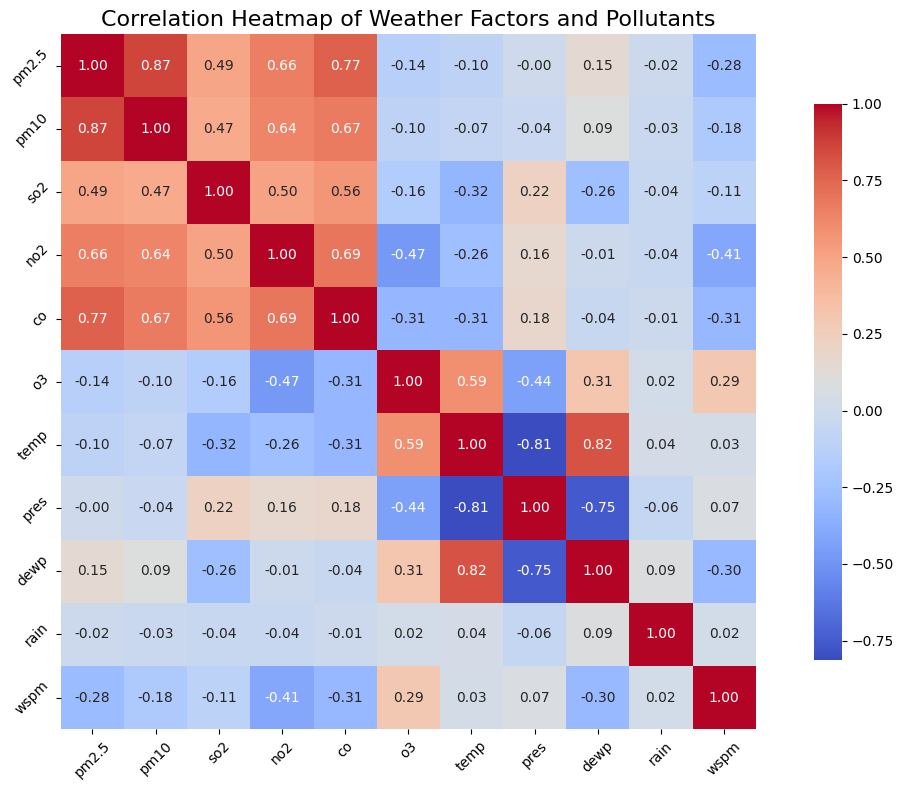

In [110]:
# Select relevant columns for correlation analysis
correlation_columns = ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temp', 'pres', 'dewp', 'rain', 'wspm']
correlation_matrix = combined_df[correlation_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Heatmap of Weather Factors and Pollutants', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

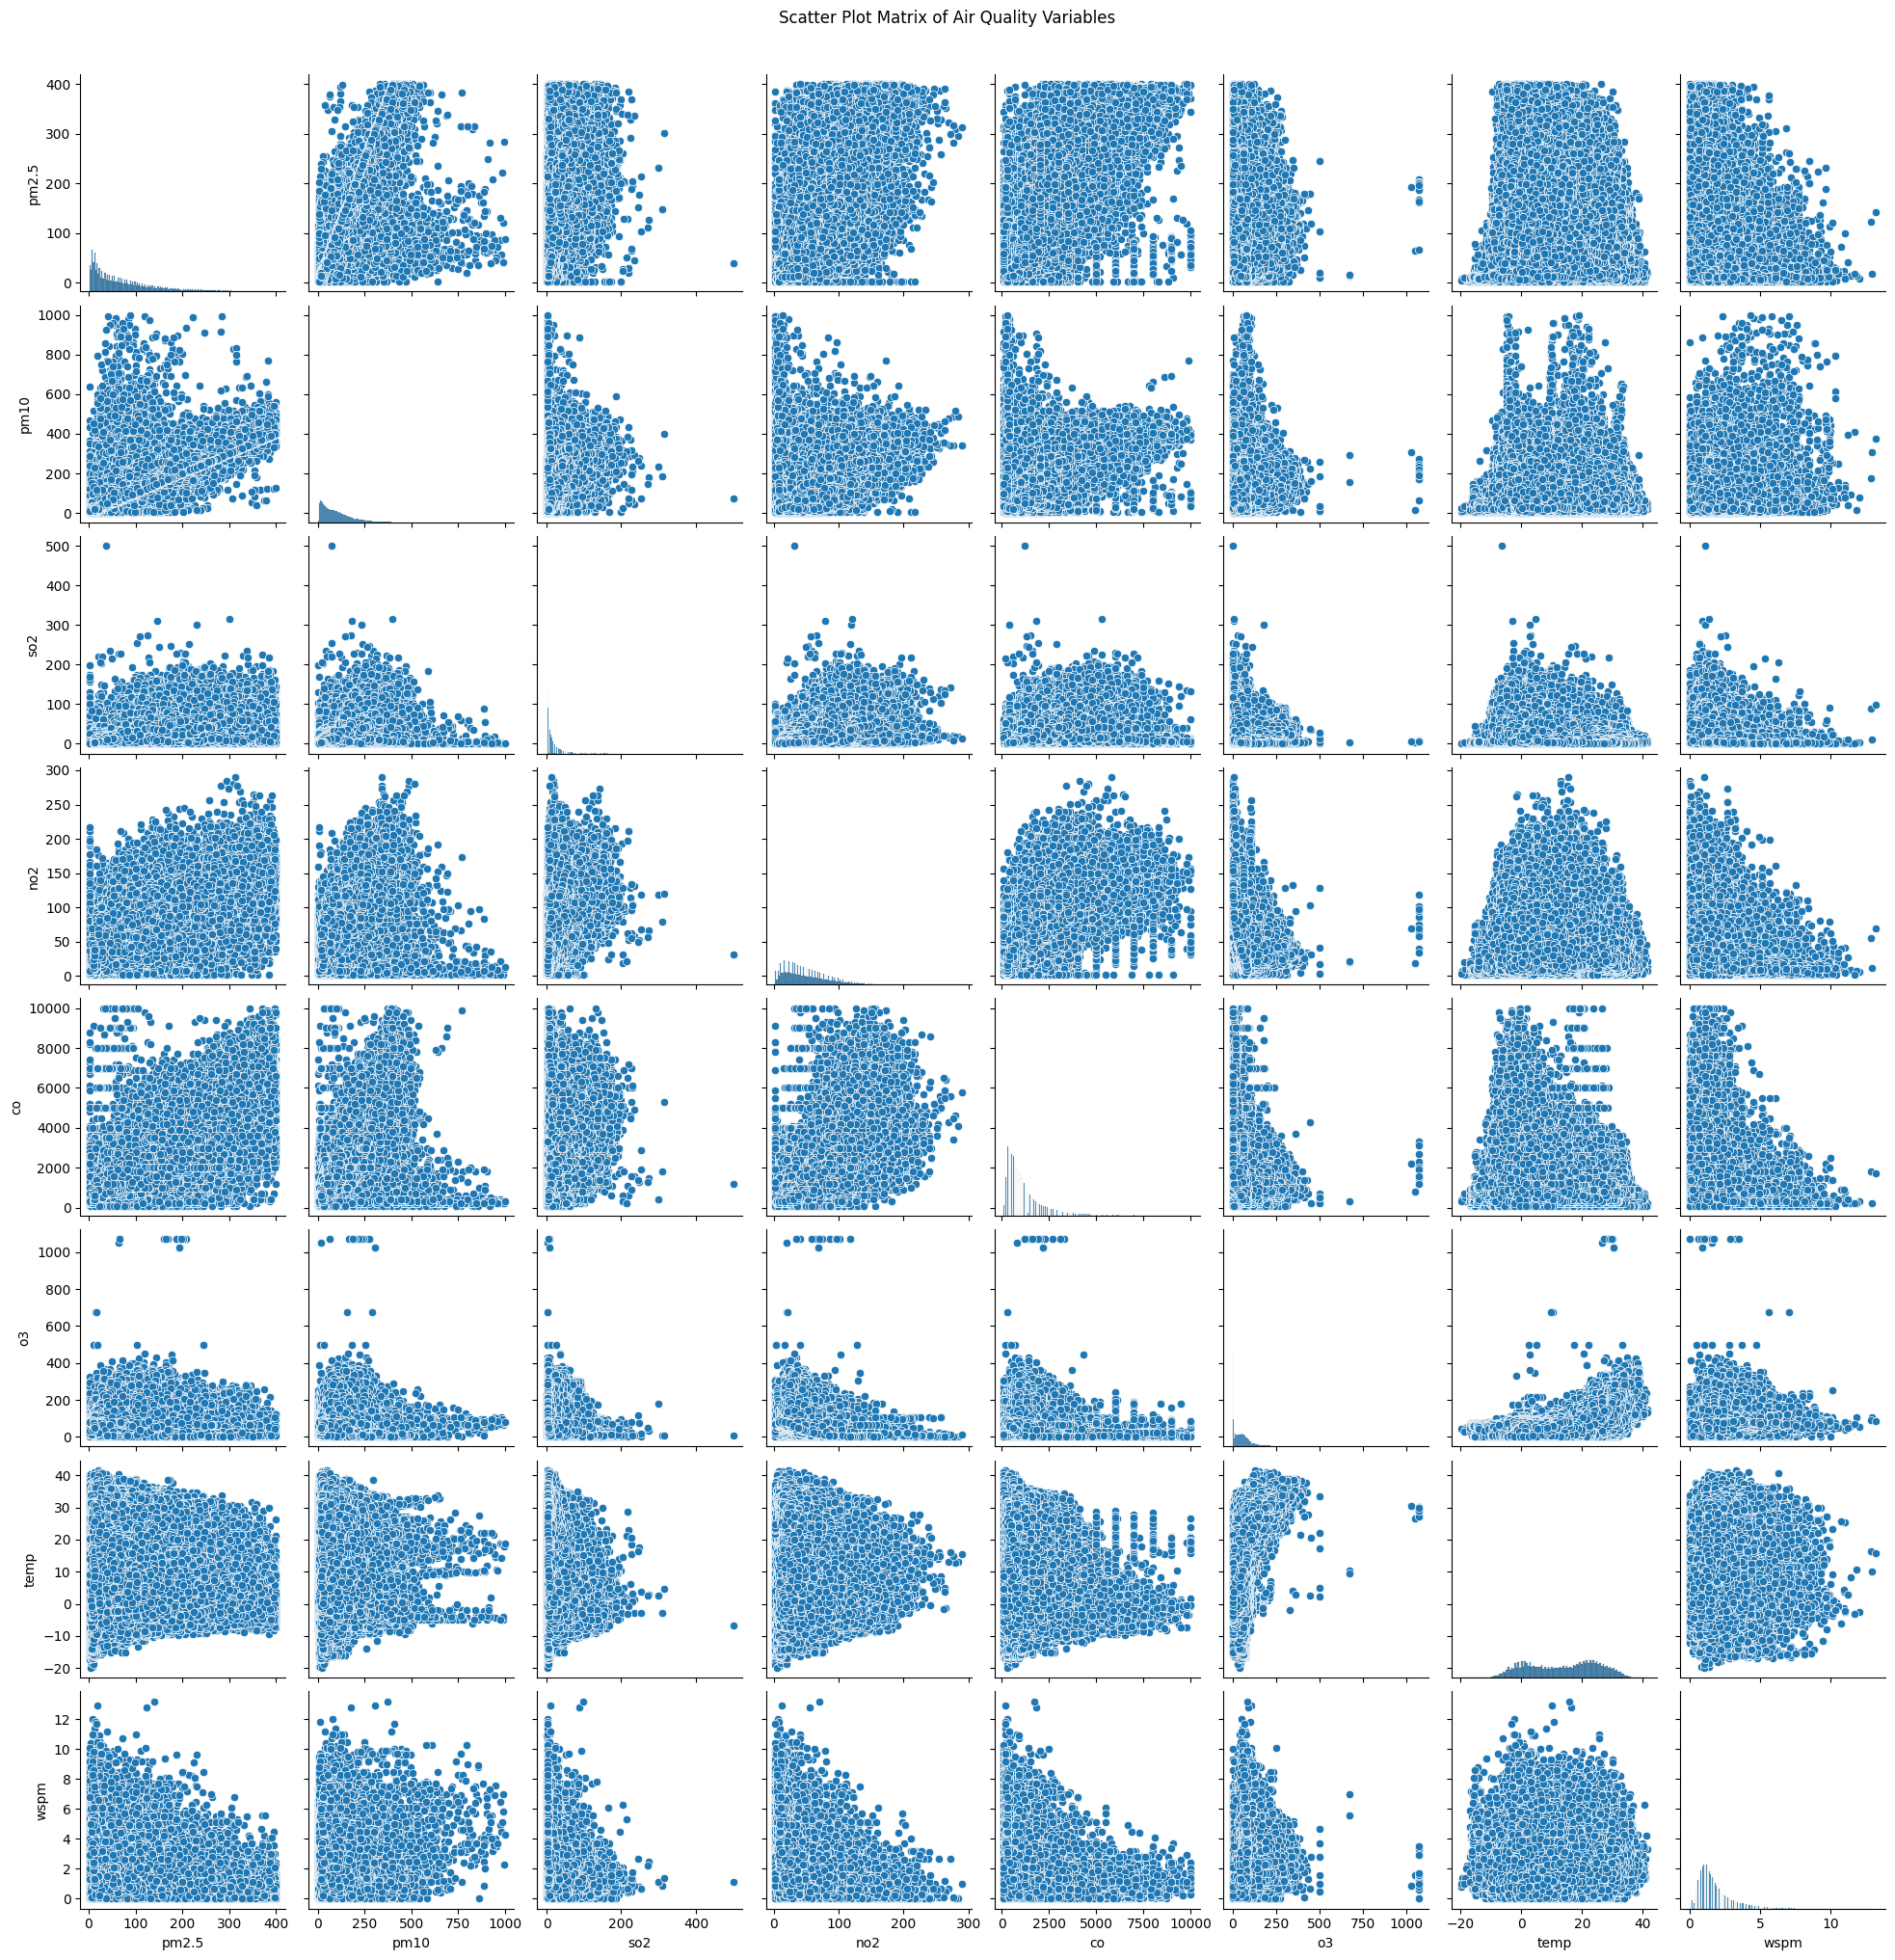

In [111]:

import matplotlib.pyplot as plt

# Selecting relevant columns for the pair plot
pair_plot_columns = ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temp', 'wspm']
sns.pairplot(combined_df[pair_plot_columns])

# Add title
plt.suptitle('Scatter Plot Matrix of Air Quality Variables', y=1.02)
plt.show()


**Insight:**
- Weather factor gives small correlation with the PM2.5 level
- On the other hand, the other pollutant such as PM10, CO, NO, and SO2 gives high correlation with the PM2.5 level

## Analisis Lanjutan (Opsional)

**1. RFM Analysis**

**2. Geospatial Analysis**

**3. Clustering Analysis**

## Conclusion

- Dari hasil Analis data yang dilakukan untuk menjawab pertanyaan 1, tren nilai PM2.5 di berbagai weather station di China dalam kurun waktu 4 tahun dari tahun 2013 - 2017 cenderung menurun dari tahun 2013 hingga tahun 2016, kemudian nilai PM2.5 meningkat signifikan pada tahun 2017. Kemudian untuk nilai rata-rata PM2.5 tertinggi per tahunnya didapatkan di stasiun cuaca Dongsi (83.046702), Nongzhanguan (82.761929), dan Wanshouxigong (82.660589)
- Dari hasil heatmap correlation matrix, didapatkan kesimpulan bahwa faktor cuaca seperti suhu, dll tidak berkorelasi terhadap nilai PM2.5, sebaliknya parameter polutan lain seperti PM10, CO, NO, dan SO2 memberikan nilai korelasi tinggi terhadap nilai PM2.5

In [114]:
# Save combined_df to a CSV file to create Dashboard Streamlit
combined_df.to_csv('dashboard/main_data.csv', index=False)